In [1]:
import pandas as pd
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
d1 = pd.read_excel('/content/test.xlsx')
df = pd.read_excel('/content/train.xlsx')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df=df.drop('customerID',axis=1)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
def ohe(df):
    x=pd.get_dummies(df)
    x=x.iloc[:,:-1]
    return x

In [11]:
x=ohe(df['gender'])
df.drop('gender',axis=1,inplace=True)
df=pd.concat([df,x],axis=1)

In [12]:
df['Partner']=df['Partner'].replace(['Yes','No'],[1,0])

In [13]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Dependents']=df['Dependents'].replace(['Yes','No'],[1,0])

In [15]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [16]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])
 
df['MultipleLines'].unique()

array([1, 0, 2])

In [17]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [18]:
df['InternetService']= label_encoder.fit_transform(df['InternetService'])

In [19]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])

In [21]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])

In [23]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,0,1,0,1,No,1,0,0,2,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,0,0,0,34,Yes,0,0,2,0,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,0,0,0,2,Yes,0,0,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,0,0,0,45,No,1,0,2,0,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,0,0,0,2,Yes,0,1,0,0,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,Yes,2,0,2,0,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,0,1,1,72,Yes,2,1,0,2,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1
7040,0,1,1,11,No,1,0,2,0,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,1,1,0,4,Yes,2,1,0,0,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0


In [24]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['PhoneService']=df['PhoneService'].replace(['Yes','No'],[1,0])

In [26]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,0,1,0,1,0,1,0,0,2,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,0,0,0,34,1,0,0,2,0,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,0,0,0,2,1,0,0,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,0,0,0,45,0,1,0,2,0,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,0,0,0,2,1,0,1,0,0,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [27]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])

In [29]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])

In [31]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])

In [33]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [34]:
df['Contract']= label_encoder.fit_transform(df['Contract'])

In [35]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df['PaperlessBilling']=df['PaperlessBilling'].replace(['Yes','No'],[1,0])

In [37]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,0,1,0,1,0,1,0,0,2,0,0,0,No,0,1,Electronic check,29.85,29.85,No,1
1,0,0,0,34,1,0,0,2,0,2,0,0,No,1,0,Mailed check,56.95,1889.5,No,0
2,0,0,0,2,1,0,0,2,2,0,0,0,No,0,1,Mailed check,53.85,108.15,Yes,0
3,0,0,0,45,0,1,0,2,0,2,2,0,No,1,0,Bank transfer (automatic),42.30,1840.75,No,0
4,0,0,0,2,1,0,1,0,0,0,0,0,No,0,1,Electronic check,70.70,151.65,Yes,1


In [38]:

df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
df['Churn']=df['Churn'].replace(['Yes','No'],[1,0])

In [40]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [41]:
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])

In [42]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])

In [44]:
df.head(50)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,1
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,1
5,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.5,1,1
6,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.4,0,0
7,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.9,0,1
8,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1,1
9,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  MonthlyCharges    7043 non-null   float64


In [46]:
df['TotalCharges'].unique()

array([29.85, 1889.5, 108.15, ..., 346.45, 306.6, 6844.5], dtype=object)

In [47]:
X=df.drop('Churn',axis=1)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Female
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [48]:
y=df["Churn"]
y=pd.DataFrame(y)
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  MonthlyCharges    7043 non-null   float64


In [50]:
X['Female'] = X['Female'].astype('int')
X['MonthlyCharges'] = X['MonthlyCharges'].astype('int')

In [51]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors='coerce')
median = X['TotalCharges'].median()
X['TotalCharges'].fillna(median,inplace=True)

In [52]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.199059
Best score using built-in LassoCV: 0.223410
Lasso picked 3 variables and eliminated the other 16 variables


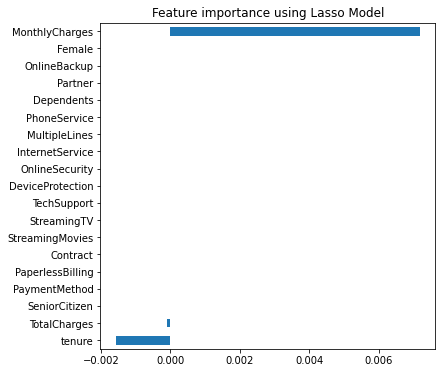

In [53]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

In [54]:
from sklearn.preprocessing import MinMaxScaler
names=X.columns
indexes=X.index
X=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X,columns=names,index=indexes)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Female
0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.11,0.001275,1.0
1,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.38,0.215867,0.0
2,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.35,0.010310,0.0
3,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.24,0.210241,0.0
4,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.52,0.015330,1.0


In [55]:
kmodel=SelectKBest(score_func=chi2,k=8)
x_clf_new=kmodel.fit_transform(X,y)
mask=kmodel.get_support()
important=X.columns[mask]
print(important,len(important))

Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object') 8


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [57]:
#alpha= []
class NaiveBayes:
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.variance = np.zeros((len(self.classes), X.shape[1]))
        self.prior = np.zeros(len(self.classes))
        for i, c in enumerate(self.classes):
            X_c = X[y==c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.variance[i, :] = X_c.var(axis=0)
            self.prior[i] = X_c.shape[0] / X.shape[0]
            
    def predict(self, X):
        posterior = np.zeros((X.shape[0], len(self.classes)))
        for i, c in enumerate(self.classes):
            likelihood = np.exp(-(X - self.mean[i, :]) ** 2 / (2 * self.variance[i, :])) / np.sqrt(2 * np.pi * self.variance[i, :])
            posterior[:, i] = np.log(likelihood).sum(axis=1) + np.log(self.prior[i])
        return self.classes[np.argmax(posterior, axis=1)]

In [59]:
nb=NaiveBayes()
nb.fit(X_train,y_train)

In [60]:
# Checking Accuracy
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

The error is happening because the accuracy function is expecting two numpy arrays as inputs, but y_test and predictions are both pandas DataFrames. To fix the error, you can convert these DataFrames to numpy arrays using the .values attribute.

Note that we also used the .ravel() method to flatten the y_test array, as the accuracy function expects a 1D array as input.

In [61]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification test data accuracy:", 
      accuracy(y_test.values.ravel(), predictions)*100)


Naive Bayes classification test data accuracy: 73.70812038614424


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb.predict(X_test)

# Calculate the evaluation metrics
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions, average='weighted')
rec = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)


Accuracy: 0.7370812038614424
Precision: 0.5432887010858332
Recall: 0.7370812038614424
F1 score: 0.6255190602237021


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# Generate example data
X = np.random.randint(0, 2, size=(100, 10))
y = np.random.randint(0, 2, size=100)

# Define hyperparameter search space
param_grid = {"alpha": [0.1, 1.0, 10.0], "fit_prior": [True, False]}

# Perform grid search
best_params, best_accuracy = grid_search(X, y, param_grid)

print("Best hyperparameters:", best_params)
print("Best accuracy:", best_accuracy*100)

Best hyperparameters: (0.1, True)
Best accuracy: 47.0


In [71]:
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    if true_positives + false_positives == 0:
        return 0
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    if true_positives + false_negatives == 0:
        return 0
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    return 2 * (p * r) / (p + r)


In [76]:
# Train Naive Bayes classifier
nb = NaiveBayes()
nb.train(X, y)

# Predict labels
y_pred = nb.predict(X)

# Compute accuracy, precision, recall, and F1 score
acc = accuracy(y, y_pred)
prec = precision(y, y_pred)
rec = recall(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.47
Precision: 0.47
Recall: 1.0
F1 Score: 0.6394557823129251
